**情境描述**：

*公司背景*：XYZ 電商是一家線上零售公司，銷售各種商品。他們關注提高用戶註冊率，以便將更多訪問者轉化為註冊用戶。

*問題*：公司懷疑當前的註冊流程可能存在一些問題，導致用戶放棄註冊。他們希望測試一個新的註冊流程，以確定是否可以提高註冊率。

**AB 測試步驟**：

**1. 定義目標和假設**：
   - **目標**：提高用戶註冊率。
   - **虛無假設（H0）**：新註冊流程不會顯著改善註冊率（註冊率相同或更低）。
   - **對立假設（Ha）**：新註冊流程會顯著提高註冊率（註冊率更高）。

**2. 確定樣本大小**：
   - 為了檢測 5% 的相對增加，以 95% 的置信度和 80% 的檢定力，需要每組 1000 名參與者。

**3. 隨機分組**：
   - 將來訪者隨機分為兩組：控制組（組 A）和實驗組（組 B）。

**4. 數據收集和實施實驗**：
   - 在一個月的時間內，監測控制組和實驗組用戶的註冊行為。

**5. 數據預處理**：
   - 清理和驗證數據，處理缺失值。

**6. 假設檢驗的注意事項**：
   - 在進行假設檢驗時，注意確保數據滿足正態性假設和方差齊性假設。

**7. 計算 P 值**：
   - 使用適當的統計檢驗方法（如 z 檢驗或 t 檢驗），計算新註冊流程對註冊率的影響。計算觀察到的 P 值。

**8. 判斷顯著性**：
   - 如果 P 值小於 0.05（顯著性水平），則拒絕虛無假設，認為新註冊流程對註冊率有顯著影響。

**9. 結果解釋**：
   - 解釋 AB 測試的結果，包括效應大小、信心區間。如果 P 值小於 0.05，可以說明新註冊流程對註冊率有積極影響。

**10. 做出決策**：
    - 基於 AB 測試的結果，公司可以決定是否採納新的註冊流程。

**11. 報告和文檔**：
    - 撰寫 AB 測試的報告，詳細說明實驗設計、數據分析方法、結果和結論。

**12. 迭代和優化**：
    - 如果新註冊流程被採納，公司可以繼續監測註冊率

**目標**：提高用戶註冊率。
   - **虛無假設（H0）**：新註冊流程不會顯著改善註冊率（註冊率相同或更低）。
   - **對立假設（Ha）**：新註冊流程會顯著提高註冊率（註冊率更高）。

## 確定樣本大小

In [97]:
import statsmodels.stats.api as sms

# 定义参数
effect_size = 0.05  # 预期效应大小
alpha = 0.05       # 显著性水平
power = 0.80       # 检定力
ratio = 1          # 样本量比例（实验组和对照组）

# 计算样本大小
sample_size = sms.NormalIndPower().solve_power(effect_size, power=power, alpha=alpha, ratio=ratio)

# 输出结果
print("所需样本大小：", int(sample_size))


所需样本大小： 6279


In [98]:
import statsmodels.stats.power as power

effect_size = 0.2  # 预期效应大小
alpha = 0.05  # 显著性水平
power_value = 0.8  # 检定力

sample_size = power.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power_value)
print("所需样本大小：", int(sample_size))


所需样本大小： 393


## 隨機分組

In [99]:
import random
import pandas as pd
import numpy as np

sample_size = 6279
# 生成一组模拟用户数据
user_ids = np.arange(1, sample_size*2)  
random.shuffle(user_ids)

# 将用户分为两组
group_a = user_ids[:sample_size]
group_b = user_ids[sample_size:]

print("控制组（组A）：", group_a)
print("实验组（组B）：", group_b)


控制组（组A）： [10504  7931  8488 ...  1350  3263  8398]
实验组（组B）： [1530 4356 3540 ...  525 5831 2328]


## 數據預處理

In [100]:
# 假设您已经收集到了实验数据，将其存储在一个数据框中
data = pd.DataFrame({
    'user_id': user_ids,
    'group': ['A' if user_id in group_a else 'B' for user_id in user_ids],
    'registration_completed': [1 if random.random() < 0.6 else 0 for _ in user_ids]
})

# 清理数据，处理缺失值等
data.dropna(inplace=True)


In [101]:
data

,user_id,group,registration_completed
0,10504,A,1
1,7931,A,1
2,8488,A,1
3,10481,A,0
4,5504,A,1
...,...,...,...
12552,154,B,1
12553,3348,B,0
12554,525,B,1
12555,5831,B,0


## 假设检验的注意事项：
- 在进行假设检验时要注意以下事项：
- 检验方法的选择：根据您的实验设计和数据类型选择适当的假设检验方法。
- 正态性假设：如果使用基于正态分布的检验方法，检查数据是否满足正态性假设。
- 方差齐性：如果适用，检查不同组的方差是否相等。
- 显著性水平：选择适当的显著性水平（通常为0.05）。
- 检定力：确保样本大小足够大以获得高檢定力。
- 多重比较问题：如果进行多个比较，考虑使用多重比较校正方法。

In [102]:
# 1. 检验方法的选择：
# 根据您的实验设计和数据类型选择适当的假设检验方法。Python提供了各种统计检验方法，如t检验、z检验、ANOVA、卡方检验等，具体选择取决于您的数据和问题。

#### 常態分布驗證

C:\Users\xdxd2\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Test: ShapiroResult(statistic=0.6232224702835083, pvalue=0.0)
D'Agostino's K^2 Test: NormaltestResult(statistic=47877.64644243326, pvalue=0.0)


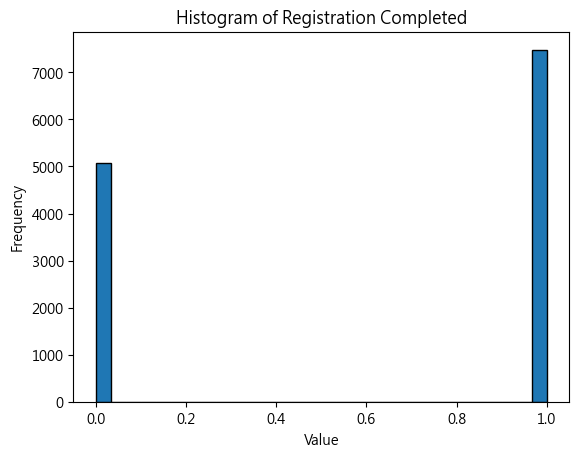

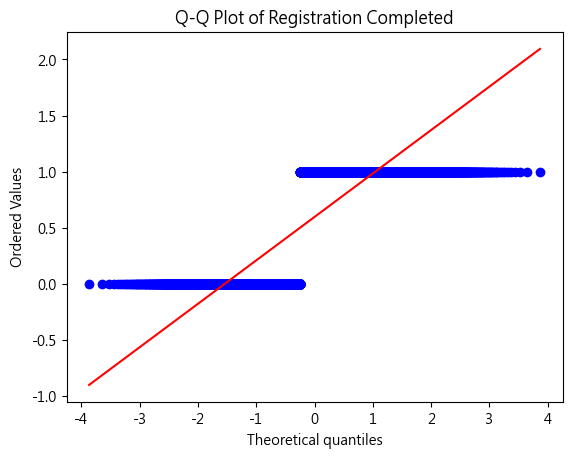

In [103]:
import random
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# 进行正态分布检验
# Shapiro-Wilk Test
shapiro_test = stats.shapiro(data['registration_completed'])
print("Shapiro-Wilk Test:", shapiro_test)

# D'Agostino's K^2 Test
k2_test = stats.normaltest(data['registration_completed'])
print("D'Agostino's K^2 Test:", k2_test)

# 可视化分析
# Histogram
plt.hist(data['registration_completed'], bins=30, edgecolor='black')
plt.title('Histogram of Registration Completed')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# QQ Plot
stats.probplot(data['registration_completed'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Registration Completed')
plt.show()



## 方差驗證

In [104]:
import scipy.stats as stats

# 假设有两组数据：group_a_data和group_b_data
statistic, p_value = stats.levene(group_a, group_b)

if p_value < 0.05:
    print("不同组的方差不相等")
else:
    print("不同组的方差相等")


不同组的方差相等


## 計算p值 - 卡方檢定

In [105]:
from scipy.stats import chi2_contingency

# 创建列联表
contingency_table = pd.crosstab(data['group'], data['registration_completed'])

print(contingency_table)
# 进行卡方检验
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Squared Test:")
print("Chi-squared Statistic:", chi2)
print("P-value:", p)

registration_completed     0     1
group                             
A                       2556  3723
B                       2520  3758
Chi-Squared Test:
Chi-squared Statistic: 0.3957769190935355
P-value: 0.5292783308012237


In [106]:
contingency_table

registration_completed,0,1
group,,
A,2556,3723
B,2520,3758


## 多重檢定問題(補充)

In [107]:
from statsmodels.stats.multitest import multipletests

# 假设有多个比较，p_values包含多个p值
p_values = [0.02, 0.03, 0.07, 0.004, 0.08]  # 示例中使用的p值列表

# 进行多重比较校正，使用Bonferroni方法
reject, corrected_p_values, _, _ = multipletests(p_values, alpha=0.05, method='bonferroni')

# 检查哪些比较显著
significant_comparisons = [i for i, rej in enumerate(reject) if rej]
print("显著性校正后的比较：", significant_comparisons)


显著性校正后的比较： [3]


## 計算P值 - T test

In [108]:
import scipy.stats as stats

# 分组数据
group_a_data = data[data['group'] == 'A']['registration_completed']
group_b_data = data[data['group'] == 'B']['registration_completed']

# 执行t检验，计算P值
t_statistic, p_value = stats.ttest_ind(group_a_data, group_b_data)
print("P值：", p_value)


P值： 0.5174808103993596


## 顯著性判斷

In [109]:
alpha = 0.05

if p_value < alpha:
    print("拒绝虚无假设，结果具有统计显著性")
else:
    print("无法拒绝虚无假设，结果不具有统计显著性")

无法拒绝虚无假设，结果不具有统计显著性


## AA test

In [120]:
import numpy as np
import scipy.stats as stats

# 随机生成两个相同的A/A测试组的示例数据
np.random.seed(42)
group_a = np.random.normal(loc=100, scale=10, size=100)  # A/A测试组 A
group_b = np.random.normal(loc=100, scale=10, size=100)  # A/A测试组 B

# 执行独立样本t检验来比较两组数据
t_statistic, p_value = stats.ttest_ind(group_a, group_b)

# 判断显著性
alpha = 0.05
if p_value < alpha:
    print("在A/A测试中发现显著差异，可能需要检查实验设置。")
else:
    print("A/A测试结果表明两组数据没有显著差异，实验设置正常。")

# 输出t统计量和P值
print("t统计量：", t_statistic)
print("P值：", p_value)


A/A测试结果表明两组数据没有显著差异，实验设置正常。
t统计量： -0.9579319437618484
P值： 0.33926528653615373
